mu: 0.0032301729706304084
mse: 0.0035109722325145257


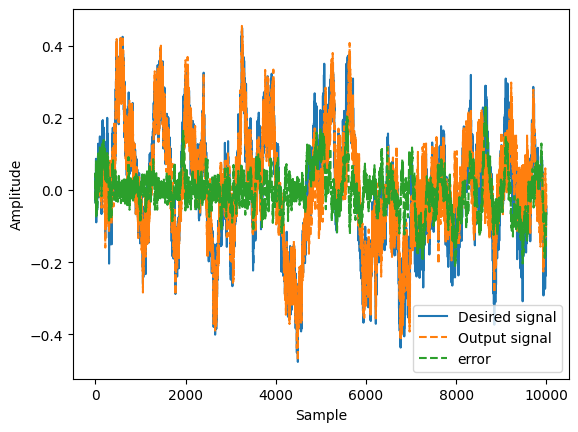

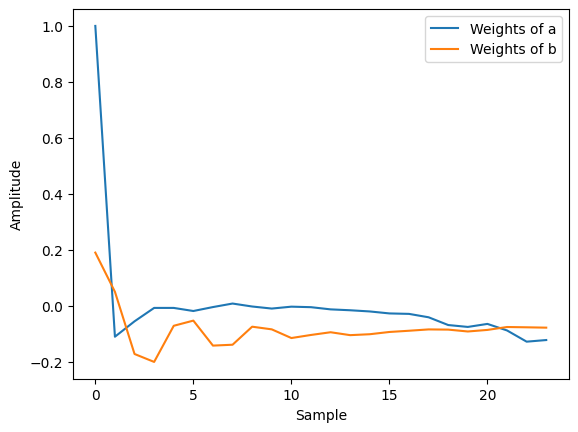

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import freqz, welch
from Signal_proctools import *
# Example usage:
processor = SignalProcessor(96000)

# Read the WAV file
fs, data = wavfile.read("test_IR-96k.wav")

# Plot the impulse response
# Find the index of the maximum value in the array
max_index = np.argmax(data)
ir=data[max_index:max_index+256]
ir = (ir - np.min(ir)) / (np.max(ir) - np.min(ir)) * 2 - 1
ir *=0.2

length=10000
t, reference_sig = processor.generate_noise_signal(length, 0.1)
t, noise = processor.generate_noise_signal(length, 0.01)
d = np.convolve(reference_sig + noise, ir)[:length] #"Desired signal"

# Example parmaters setup:
N = 24
mu = 0.48
y, err, a,b = processor.lms_IIR_filter(reference_sig, d, N, mu)

mse=processor.custom_mse(d, y)
print("mse:",mse)

#Plot the results
plt.plot(d, label="Desired signal")
plt.plot(y,'--', label="Output signal")
plt.plot(err,'--',  label="error")
# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()


#Plot the results of determined IR weights
plt.plot(a, label="Weights of a")
plt.plot(b, label="Weights of b")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
# Show the plot
plt.show()


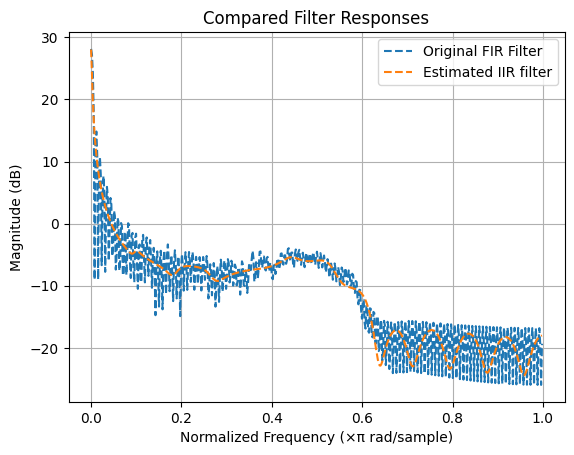

In [2]:
# Frequency response of the optimized IIR filter
freq, response_ = freqz(ir, 1)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_)), label='Original FIR Filter', linestyle='--')

freq, response_ = freqz(b,a)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_)), label='Estimated IIR filter', linestyle='--')
plt.title('Compared Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
print(a)

[ 1.         -0.11098875 -0.05594343 -0.00801565 -0.00804838 -0.019083
 -0.00499934  0.0075936  -0.00298756 -0.01034252 -0.00356822 -0.00539619
 -0.01323734 -0.01641517 -0.02065969 -0.02772157 -0.0293726  -0.04152308
 -0.06922397 -0.07601191 -0.06521212 -0.08856545 -0.12867284 -0.12287674]


In [4]:
print(b)

[ 0.18967969  0.04964803 -0.17271661 -0.20108547 -0.07190961 -0.05342433
 -0.14274868 -0.13961514 -0.07514529 -0.08466638 -0.11570836 -0.10470563
 -0.09500145 -0.10538677 -0.10207669 -0.09404035 -0.08964315 -0.08488218
 -0.0856011  -0.0922805  -0.08667355 -0.07629197 -0.07734563 -0.07859005]


/tmp/ipykernel_15718/3528302291.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read("pedal_/whitenoise.wav", mmap=False)
/tmp/ipykernel_15718/3528302291.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, d = wavfile.read("pedal_/Setting4no_latency.wav", mmap=False)


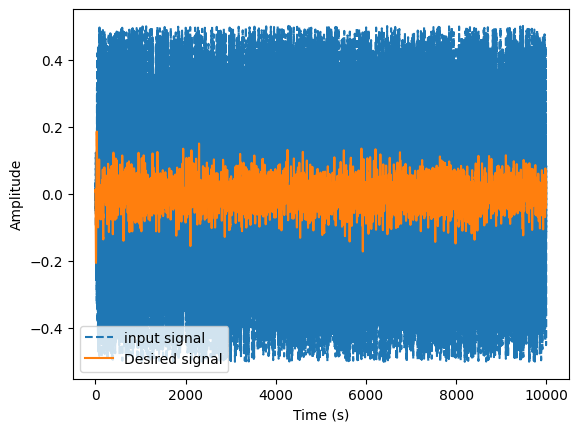

mu: 0.0018842675662010687
mse: 0.00036515357966436415
Estimated error: 0.019108992115346224


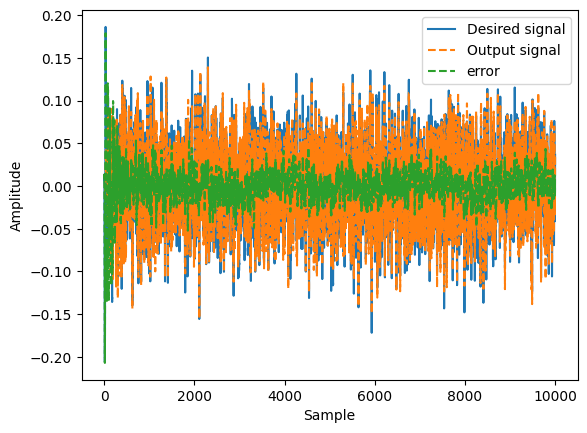

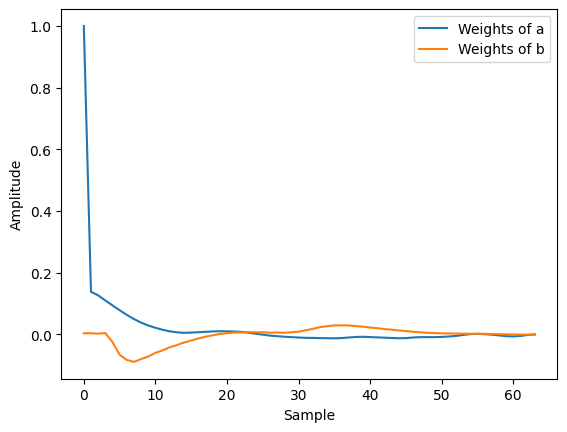

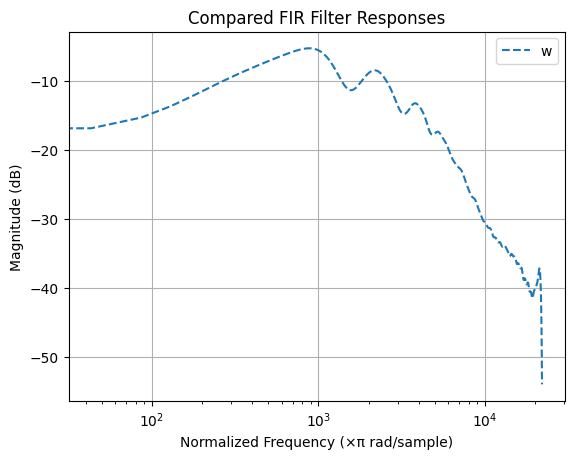

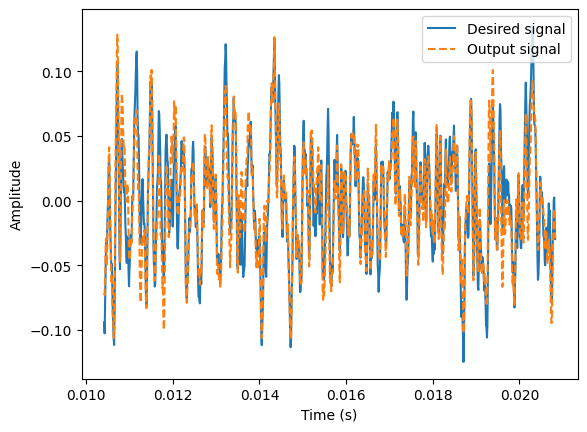

In [7]:

# Read the WAV file
fs, x = wavfile.read("pedal_/whitenoise.wav", mmap=False)
fs, d = wavfile.read("pedal_/Setting4no_latency.wav", mmap=False)
# Example usage:
processor = SignalProcessor(fs)

x = x.astype(float)[:10000]
d = d.astype(float)[:10000]
x /=32768.0
d /= 32768.0
x=x[:,0]
#Plot the results
plt.plot(x,'--', label="input signal")
plt.plot(d, label="Desired signal")
# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()


# Example parmaters setup:
N = 64
mu = 0.28
y, err, a,b = processor.lms_IIR_filter(x, d, N, mu)

mse=processor.custom_mse(d, y)
print("mse:",mse)

err=np.array(err)
print("Estimated error:",np.sqrt(np.mean((err)**2)))
#Plot the results
plt.plot(d, label="Desired signal")
plt.plot(y,'--', label="Output signal")
plt.plot(err,'--',  label="error")
# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()


#Plot the results of determined IR weights
plt.plot(a, label="Weights of a")
plt.plot(b, label="Weights of b")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
# Show the plot
plt.show()


freq, response_ = freqz(b,a)

# Plotting the responses
plt.semilogx(freq / np.pi*44100*0.5, 20 * np.log10(abs(response_)), label='w', linestyle='--')
plt.title('Compared FIR Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()

plot_length=1000
#Plot the results
plt.plot(t[plot_length:plot_length*2],d[plot_length:plot_length*2], label="Desired signal")
plt.plot(t[plot_length:plot_length*2],y[plot_length:plot_length*2],'--', label="Output signal")
# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()